In [1]:
%matplotlib inline

import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import rosbag
import argparse
from cv_bridge import CvBridge, CvBridgeError

In [3]:
def get_data(path):
    bridge = CvBridge()
    bag = rosbag.Bag(path)
    topics = [
        '/zed/rgb/image_rect_color',
        '/control_drive_parameters'
    ]

    angle = 0.0
    count = 0

    images = []
    labels = []

    for topic, message, timestamp in bag.read_messages(topics=topics):
        print('{}: [{}]: {}'.format(timestamp, topic, ''))
    
        if topic == '/zed/rgb/image_rect_color':
            count += 1
            
            try:
                image = bridge.imgmsg_to_cv2(message)

                # crop and resize
                image = image[188:, 0:672, 0:3]
                image = cv2.resize(image, (320, 160))
                
                #image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
                
                # convert to grayscale
#                 weights = [1, 0, 0] # BGR (standard luminescence: [0.114, 0.587, 0.299])
#                 weights = np.array([weights]).reshape((1,3))
#                 image = cv2.transform(image, weights)

                print('[{}] message=({}, {}), shape=({})'.format(count, message.height, message.width, image.shape))

                images.append(image)
                labels.append(angle)
            except CvBridgeError as e:
                print(e)

        elif topic == '/control_drive_parameters':
            angle = message.angle


    bag.close()

    return np.array(images), np.array(labels)

In [4]:
LOAD_LOC = "/home/vufuturetech/utilities/zed/data/2019-01-30-18-02-11.bag"
images, labels = get_data("/home/vufuturetech/utilities/zed/data/2019-01-30-18-02-11.bag")

1548892932127249304: [/zed/rgb/image_rect_color]: 
[1] message=(720, 1280), shape=((160, 320, 3))
1548892932156771677: [/zed/rgb/image_rect_color]: 
[2] message=(720, 1280), shape=((160, 320, 3))
1548892932170538307: [/zed/rgb/image_rect_color]: 
[3] message=(720, 1280), shape=((160, 320, 3))
1548892932205802532: [/zed/rgb/image_rect_color]: 
[4] message=(720, 1280), shape=((160, 320, 3))
1548892932215586099: [/zed/rgb/image_rect_color]: 
[5] message=(720, 1280), shape=((160, 320, 3))
1548892932224757762: [/zed/rgb/image_rect_color]: 
[6] message=(720, 1280), shape=((160, 320, 3))
1548892932236184798: [/zed/rgb/image_rect_color]: 
[7] message=(720, 1280), shape=((160, 320, 3))
1548892932249765932: [/zed/rgb/image_rect_color]: 
[8] message=(720, 1280), shape=((160, 320, 3))
1548892932268109449: [/zed/rgb/image_rect_color]: 
[9] message=(720, 1280), shape=((160, 320, 3))
1548892932280635629: [/zed/rgb/image_rect_color]: 
[10] message=(720, 1280), shape=((160, 320, 3))
1548892932295235432

1548892933461791479: [/zed/rgb/image_rect_color]: 
[75] message=(720, 1280), shape=((160, 320, 3))
1548892933482590061: [/zed/rgb/image_rect_color]: 
[76] message=(720, 1280), shape=((160, 320, 3))
1548892933489368764: [/zed/rgb/image_rect_color]: 
[77] message=(720, 1280), shape=((160, 320, 3))
1548892933489448120: [/control_drive_parameters]: 
1548892933489461464: [/control_drive_parameters]: 
1548892933503390883: [/control_drive_parameters]: 
1548892933503408962: [/control_drive_parameters]: 
1548892933503490078: [/control_drive_parameters]: 
1548892933508048188: [/zed/rgb/image_rect_color]: 
[78] message=(720, 1280), shape=((160, 320, 3))
1548892933521450849: [/zed/rgb/image_rect_color]: 
[79] message=(720, 1280), shape=((160, 320, 3))
1548892933535305777: [/control_drive_parameters]: 
1548892933535326800: [/control_drive_parameters]: 
1548892933537807636: [/zed/rgb/image_rect_color]: 
[80] message=(720, 1280), shape=((160, 320, 3))
1548892933547537009: [/control_drive_parameters]:

[134] message=(720, 1280), shape=((160, 320, 3))
1548892934603098006: [/control_drive_parameters]: 
1548892934606512880: [/zed/rgb/image_rect_color]: 
[135] message=(720, 1280), shape=((160, 320, 3))
1548892934617282372: [/control_drive_parameters]: 
1548892934632092147: [/control_drive_parameters]: 
1548892934634567131: [/zed/rgb/image_rect_color]: 
[136] message=(720, 1280), shape=((160, 320, 3))
1548892934639659555: [/zed/rgb/image_rect_color]: 
[137] message=(720, 1280), shape=((160, 320, 3))
1548892934655067349: [/control_drive_parameters]: 
1548892934657092915: [/zed/rgb/image_rect_color]: 
[138] message=(720, 1280), shape=((160, 320, 3))
1548892934668170744: [/control_drive_parameters]: 
1548892934673475830: [/zed/rgb/image_rect_color]: 
[139] message=(720, 1280), shape=((160, 320, 3))
1548892934709238250: [/control_drive_parameters]: 
1548892934718835255: [/control_drive_parameters]: 
1548892934722023164: [/zed/rgb/image_rect_color]: 
[140] message=(720, 1280), shape=((160, 320

1548892935888405616: [/zed/rgb/image_rect_color]: 
[204] message=(720, 1280), shape=((160, 320, 3))
1548892935888933687: [/control_drive_parameters]: 
1548892935905288844: [/control_drive_parameters]: 
1548892935905647003: [/zed/rgb/image_rect_color]: 
[205] message=(720, 1280), shape=((160, 320, 3))
1548892935915417386: [/zed/rgb/image_rect_color]: 
[206] message=(720, 1280), shape=((160, 320, 3))
1548892935932844301: [/zed/rgb/image_rect_color]: 
[207] message=(720, 1280), shape=((160, 320, 3))
1548892935958930739: [/zed/rgb/image_rect_color]: 
[208] message=(720, 1280), shape=((160, 320, 3))
1548892935991784727: [/zed/rgb/image_rect_color]: 
[209] message=(720, 1280), shape=((160, 320, 3))
1548892936006586333: [/zed/rgb/image_rect_color]: 
[210] message=(720, 1280), shape=((160, 320, 3))
1548892936022967458: [/zed/rgb/image_rect_color]: 
[211] message=(720, 1280), shape=((160, 320, 3))
1548892936038331927: [/zed/rgb/image_rect_color]: 
[212] message=(720, 1280), shape=((160, 320, 3)

[270] message=(720, 1280), shape=((160, 320, 3))
1548892937176077361: [/zed/rgb/image_rect_color]: 
[271] message=(720, 1280), shape=((160, 320, 3))
1548892937192189140: [/zed/rgb/image_rect_color]: 
[272] message=(720, 1280), shape=((160, 320, 3))
1548892937207851882: [/zed/rgb/image_rect_color]: 
[273] message=(720, 1280), shape=((160, 320, 3))
1548892937223794036: [/zed/rgb/image_rect_color]: 
[274] message=(720, 1280), shape=((160, 320, 3))
1548892937256167410: [/control_drive_parameters]: 
1548892937261185741: [/control_drive_parameters]: 
1548892937262321529: [/control_drive_parameters]: 
1548892937305087678: [/zed/rgb/image_rect_color]: 
[275] message=(720, 1280), shape=((160, 320, 3))
1548892937326816640: [/zed/rgb/image_rect_color]: 
[276] message=(720, 1280), shape=((160, 320, 3))
1548892937340578925: [/zed/rgb/image_rect_color]: 
[277] message=(720, 1280), shape=((160, 320, 3))
1548892937359032293: [/zed/rgb/image_rect_color]: 
[278] message=(720, 1280), shape=((160, 320, 3)

1548892938561767754: [/zed/rgb/image_rect_color]: 
[343] message=(720, 1280), shape=((160, 320, 3))
1548892938572934745: [/control_drive_parameters]: 
1548892938574661004: [/zed/rgb/image_rect_color]: 
[344] message=(720, 1280), shape=((160, 320, 3))
1548892938575216787: [/control_drive_parameters]: 
1548892938576731440: [/control_drive_parameters]: 
1548892938577598793: [/control_drive_parameters]: 
1548892938579921890: [/control_drive_parameters]: 
1548892938597010921: [/control_drive_parameters]: 
1548892938607067721: [/zed/rgb/image_rect_color]: 
[345] message=(720, 1280), shape=((160, 320, 3))
1548892938614583611: [/control_drive_parameters]: 
1548892938626196245: [/zed/rgb/image_rect_color]: 
[346] message=(720, 1280), shape=((160, 320, 3))
1548892938635027340: [/control_drive_parameters]: 
1548892938645347617: [/zed/rgb/image_rect_color]: 
[347] message=(720, 1280), shape=((160, 320, 3))
1548892938653084136: [/control_drive_parameters]: 
1548892938662026778: [/zed/rgb/image_rect

1548892951286736573: [/zed/rgb/image_rect_color]: 
[406] message=(720, 1280), shape=((160, 320, 3))
1548892951943498273: [/control_drive_parameters]: 
1548892951947345702: [/control_drive_parameters]: 
1548892951951576543: [/zed/rgb/image_rect_color]: 
[407] message=(720, 1280), shape=((160, 320, 3))
1548892952546904957: [/control_drive_parameters]: 
1548892952563752434: [/zed/rgb/image_rect_color]: 
[408] message=(720, 1280), shape=((160, 320, 3))
1548892953118436919: [/control_drive_parameters]: 
1548892953132269910: [/zed/rgb/image_rect_color]: 
[409] message=(720, 1280), shape=((160, 320, 3))
1548892953865224273: [/control_drive_parameters]: 
1548892953883825825: [/control_drive_parameters]: 
1548892953886602125: [/zed/rgb/image_rect_color]: 
[410] message=(720, 1280), shape=((160, 320, 3))
1548892954431586822: [/control_drive_parameters]: 
1548892954451530655: [/zed/rgb/image_rect_color]: 
[411] message=(720, 1280), shape=((160, 320, 3))
1548892954984911606: [/control_drive_parame

1548892973541599387: [/zed/rgb/image_rect_color]: 
[466] message=(720, 1280), shape=((160, 320, 3))
1548892973786392107: [/control_drive_parameters]: 
1548892973793730921: [/zed/rgb/image_rect_color]: 
[467] message=(720, 1280), shape=((160, 320, 3))
1548892973987607459: [/control_drive_parameters]: 
1548892973989462282: [/zed/rgb/image_rect_color]: 
[468] message=(720, 1280), shape=((160, 320, 3))
1548892974122793225: [/zed/rgb/image_rect_color]: 
[469] message=(720, 1280), shape=((160, 320, 3))
1548892974287963459: [/control_drive_parameters]: 
1548892974294952811: [/zed/rgb/image_rect_color]: 
[470] message=(720, 1280), shape=((160, 320, 3))
1548892974496393851: [/zed/rgb/image_rect_color]: 
[471] message=(720, 1280), shape=((160, 320, 3))
1548892974656691443: [/zed/rgb/image_rect_color]: 
[472] message=(720, 1280), shape=((160, 320, 3))
1548892974849762412: [/control_drive_parameters]: 
1548892974867689770: [/control_drive_parameters]: 
1548892974872873000: [/zed/rgb/image_rect_col

1548892984157643056: [/zed/rgb/image_rect_color]: 
[524] message=(720, 1280), shape=((160, 320, 3))
1548892984336646115: [/control_drive_parameters]: 
1548892984348347525: [/zed/rgb/image_rect_color]: 
[525] message=(720, 1280), shape=((160, 320, 3))
1548892984492528080: [/zed/rgb/image_rect_color]: 
[526] message=(720, 1280), shape=((160, 320, 3))
1548892984669761452: [/control_drive_parameters]: 
1548892984673210490: [/zed/rgb/image_rect_color]: 
[527] message=(720, 1280), shape=((160, 320, 3))
1548892984839762414: [/zed/rgb/image_rect_color]: 
[528] message=(720, 1280), shape=((160, 320, 3))
1548892984979615407: [/zed/rgb/image_rect_color]: 
[529] message=(720, 1280), shape=((160, 320, 3))
1548892985152842664: [/control_drive_parameters]: 
1548892985158512846: [/zed/rgb/image_rect_color]: 
[530] message=(720, 1280), shape=((160, 320, 3))
1548892985302805629: [/control_drive_parameters]: 
1548892985320056014: [/control_drive_parameters]: 
1548892985323297088: [/zed/rgb/image_rect_col

1548892992380187043: [/zed/rgb/image_rect_color]: 
[587] message=(720, 1280), shape=((160, 320, 3))
1548892992552898124: [/control_drive_parameters]: 
1548892992569149648: [/control_drive_parameters]: 
1548892992570220784: [/zed/rgb/image_rect_color]: 
[588] message=(720, 1280), shape=((160, 320, 3))
1548892992692135629: [/zed/rgb/image_rect_color]: 
[589] message=(720, 1280), shape=((160, 320, 3))
1548892992925111973: [/zed/rgb/image_rect_color]: 
[590] message=(720, 1280), shape=((160, 320, 3))
1548892993166637161: [/zed/rgb/image_rect_color]: 
[591] message=(720, 1280), shape=((160, 320, 3))
1548892993351345296: [/zed/rgb/image_rect_color]: 
[592] message=(720, 1280), shape=((160, 320, 3))
1548892993518517158: [/control_drive_parameters]: 
1548892993540838522: [/zed/rgb/image_rect_color]: 
[593] message=(720, 1280), shape=((160, 320, 3))
1548892993685771485: [/zed/rgb/image_rect_color]: 
[594] message=(720, 1280), shape=((160, 320, 3))
1548892993837456646: [/zed/rgb/image_rect_color

1548893002004015525: [/zed/rgb/image_rect_color]: 
[648] message=(720, 1280), shape=((160, 320, 3))
1548893002121988404: [/zed/rgb/image_rect_color]: 
[649] message=(720, 1280), shape=((160, 320, 3))
1548893002254451140: [/zed/rgb/image_rect_color]: 
[650] message=(720, 1280), shape=((160, 320, 3))
1548893002370970058: [/control_drive_parameters]: 
1548893002378490588: [/zed/rgb/image_rect_color]: 
[651] message=(720, 1280), shape=((160, 320, 3))
1548893002491741548: [/control_drive_parameters]: 
1548893002504251711: [/zed/rgb/image_rect_color]: 
[652] message=(720, 1280), shape=((160, 320, 3))
1548893002606282917: [/zed/rgb/image_rect_color]: 
[653] message=(720, 1280), shape=((160, 320, 3))
1548893002740030141: [/control_drive_parameters]: 
1548893002752285774: [/zed/rgb/image_rect_color]: 
[654] message=(720, 1280), shape=((160, 320, 3))
1548893002928837251: [/control_drive_parameters]: 
1548893002937358396: [/control_drive_parameters]: 
1548893002957314848: [/control_drive_paramete

1548893010125807403: [/zed/rgb/image_rect_color]: 
[704] message=(720, 1280), shape=((160, 320, 3))
1548893010257796333: [/control_drive_parameters]: 
1548893010265533222: [/zed/rgb/image_rect_color]: 
[705] message=(720, 1280), shape=((160, 320, 3))
1548893010433038014: [/zed/rgb/image_rect_color]: 
[706] message=(720, 1280), shape=((160, 320, 3))
1548893010574544333: [/control_drive_parameters]: 
1548893010582037410: [/zed/rgb/image_rect_color]: 
[707] message=(720, 1280), shape=((160, 320, 3))
1548893010775621796: [/control_drive_parameters]: 
1548893010789066813: [/zed/rgb/image_rect_color]: 
[708] message=(720, 1280), shape=((160, 320, 3))
1548893010984104528: [/zed/rgb/image_rect_color]: 
[709] message=(720, 1280), shape=((160, 320, 3))
1548893011142783506: [/control_drive_parameters]: 
1548893011167848767: [/zed/rgb/image_rect_color]: 
[710] message=(720, 1280), shape=((160, 320, 3))
1548893011294125033: [/control_drive_parameters]: 
1548893011299851438: [/zed/rgb/image_rect_col

1548893019849008460: [/zed/rgb/image_rect_color]: 
[769] message=(720, 1280), shape=((160, 320, 3))
1548893019947736099: [/control_drive_parameters]: 
1548893019972867937: [/zed/rgb/image_rect_color]: 
[770] message=(720, 1280), shape=((160, 320, 3))
1548893020144649652: [/zed/rgb/image_rect_color]: 
[771] message=(720, 1280), shape=((160, 320, 3))
1548893020284417977: [/zed/rgb/image_rect_color]: 
[772] message=(720, 1280), shape=((160, 320, 3))
1548893020444839644: [/control_drive_parameters]: 
1548893020451056358: [/zed/rgb/image_rect_color]: 
[773] message=(720, 1280), shape=((160, 320, 3))
1548893020601955079: [/zed/rgb/image_rect_color]: 
[774] message=(720, 1280), shape=((160, 320, 3))
1548893020777657102: [/control_drive_parameters]: 
1548893020779400012: [/zed/rgb/image_rect_color]: 
[775] message=(720, 1280), shape=((160, 320, 3))
1548893020866778231: [/zed/rgb/image_rect_color]: 
[776] message=(720, 1280), shape=((160, 320, 3))
1548893021009662739: [/control_drive_parameters

1548893028798338002: [/zed/rgb/image_rect_color]: 
[829] message=(720, 1280), shape=((160, 320, 3))
1548893028974719839: [/control_drive_parameters]: 
1548893028984821940: [/zed/rgb/image_rect_color]: 
[830] message=(720, 1280), shape=((160, 320, 3))
1548893029112567861: [/zed/rgb/image_rect_color]: 
[831] message=(720, 1280), shape=((160, 320, 3))
1548893029330815363: [/zed/rgb/image_rect_color]: 
[832] message=(720, 1280), shape=((160, 320, 3))
1548893029466713244: [/zed/rgb/image_rect_color]: 
[833] message=(720, 1280), shape=((160, 320, 3))
1548893029624442926: [/zed/rgb/image_rect_color]: 
[834] message=(720, 1280), shape=((160, 320, 3))
1548893029743638207: [/zed/rgb/image_rect_color]: 
[835] message=(720, 1280), shape=((160, 320, 3))
1548893029941744505: [/control_drive_parameters]: 
1548893029961563430: [/control_drive_parameters]: 
1548893029963517968: [/zed/rgb/image_rect_color]: 
[836] message=(720, 1280), shape=((160, 320, 3))
1548893030116375473: [/zed/rgb/image_rect_color

1548893038437298272: [/zed/rgb/image_rect_color]: 
[893] message=(720, 1280), shape=((160, 320, 3))
1548893038552264935: [/control_drive_parameters]: 
1548893038559137977: [/zed/rgb/image_rect_color]: 
[894] message=(720, 1280), shape=((160, 320, 3))
1548893038775702668: [/zed/rgb/image_rect_color]: 
[895] message=(720, 1280), shape=((160, 320, 3))
1548893038874136870: [/zed/rgb/image_rect_color]: 
[896] message=(720, 1280), shape=((160, 320, 3))
1548893039010366326: [/zed/rgb/image_rect_color]: 
[897] message=(720, 1280), shape=((160, 320, 3))
1548893039215385757: [/zed/rgb/image_rect_color]: 
[898] message=(720, 1280), shape=((160, 320, 3))
1548893039369343198: [/control_drive_parameters]: 
1548893039373322919: [/zed/rgb/image_rect_color]: 
[899] message=(720, 1280), shape=((160, 320, 3))
1548893039519786051: [/control_drive_parameters]: 
1548893039529322911: [/control_drive_parameters]: 
1548893039530536895: [/zed/rgb/image_rect_color]: 
[900] message=(720, 1280), shape=((160, 320, 

[953] message=(720, 1280), shape=((160, 320, 3))
1548893047419193645: [/control_drive_parameters]: 
1548893047422793208: [/zed/rgb/image_rect_color]: 
[954] message=(720, 1280), shape=((160, 320, 3))
1548893047571593638: [/zed/rgb/image_rect_color]: 
[955] message=(720, 1280), shape=((160, 320, 3))
1548893047700385051: [/control_drive_parameters]: 
1548893047704082282: [/zed/rgb/image_rect_color]: 
[956] message=(720, 1280), shape=((160, 320, 3))
1548893047779592897: [/control_drive_parameters]: 
1548893047783640795: [/zed/rgb/image_rect_color]: 
[957] message=(720, 1280), shape=((160, 320, 3))
1548893047930244678: [/control_drive_parameters]: 
1548893047938233045: [/zed/rgb/image_rect_color]: 
[958] message=(720, 1280), shape=((160, 320, 3))
1548893048065072459: [/control_drive_parameters]: 
1548893048072202148: [/zed/rgb/image_rect_color]: 
[959] message=(720, 1280), shape=((160, 320, 3))
1548893048196398052: [/zed/rgb/image_rect_color]: 
[960] message=(720, 1280), shape=((160, 320, 

1548893056336650872: [/zed/rgb/image_rect_color]: 
[1016] message=(720, 1280), shape=((160, 320, 3))
1548893056434414842: [/control_drive_parameters]: 
1548893056437251354: [/zed/rgb/image_rect_color]: 
[1017] message=(720, 1280), shape=((160, 320, 3))
1548893056580321429: [/control_drive_parameters]: 
1548893056601726279: [/zed/rgb/image_rect_color]: 
[1018] message=(720, 1280), shape=((160, 320, 3))
1548893056751746092: [/zed/rgb/image_rect_color]: 
[1019] message=(720, 1280), shape=((160, 320, 3))
1548893056934612901: [/zed/rgb/image_rect_color]: 
[1020] message=(720, 1280), shape=((160, 320, 3))
1548893057055394437: [/zed/rgb/image_rect_color]: 
[1021] message=(720, 1280), shape=((160, 320, 3))
1548893057231694695: [/control_drive_parameters]: 
1548893057234555785: [/zed/rgb/image_rect_color]: 
[1022] message=(720, 1280), shape=((160, 320, 3))
1548893057385207456: [/control_drive_parameters]: 
1548893057387701205: [/zed/rgb/image_rect_color]: 
[1023] message=(720, 1280), shape=((16

[1068] message=(720, 1280), shape=((160, 320, 3))
1548893062083876321: [/control_drive_parameters]: 
1548893062086510432: [/zed/rgb/image_rect_color]: 
[1069] message=(720, 1280), shape=((160, 320, 3))
1548893062096618637: [/zed/rgb/image_rect_color]: 
[1070] message=(720, 1280), shape=((160, 320, 3))
1548893062098613845: [/control_drive_parameters]: 
1548893062099822784: [/control_drive_parameters]: 
1548893062103057333: [/control_drive_parameters]: 
1548893062111920597: [/zed/rgb/image_rect_color]: 
[1071] message=(720, 1280), shape=((160, 320, 3))
1548893062114759452: [/control_drive_parameters]: 
1548893062116382038: [/control_drive_parameters]: 
1548893062132071244: [/zed/rgb/image_rect_color]: 
[1072] message=(720, 1280), shape=((160, 320, 3))
1548893062132580831: [/control_drive_parameters]: 
1548893062134576039: [/control_drive_parameters]: 
1548893062142848145: [/zed/rgb/image_rect_color]: 
[1073] message=(720, 1280), shape=((160, 320, 3))
1548893062150561032: [/control_drive_

[1114] message=(720, 1280), shape=((160, 320, 3))
1548893062957007134: [/zed/rgb/image_rect_color]: 
[1115] message=(720, 1280), shape=((160, 320, 3))
1548893062977892752: [/zed/rgb/image_rect_color]: 
[1116] message=(720, 1280), shape=((160, 320, 3))
1548893062986183707: [/zed/rgb/image_rect_color]: 
[1117] message=(720, 1280), shape=((160, 320, 3))
1548893063004460720: [/zed/rgb/image_rect_color]: 
[1118] message=(720, 1280), shape=((160, 320, 3))
1548893063025039839: [/zed/rgb/image_rect_color]: 
[1119] message=(720, 1280), shape=((160, 320, 3))
1548893063035142031: [/zed/rgb/image_rect_color]: 
[1120] message=(720, 1280), shape=((160, 320, 3))
1548893063063067018: [/zed/rgb/image_rect_color]: 
[1121] message=(720, 1280), shape=((160, 320, 3))
1548893063070265424: [/zed/rgb/image_rect_color]: 
[1122] message=(720, 1280), shape=((160, 320, 3))
1548893063085712996: [/zed/rgb/image_rect_color]: 
[1123] message=(720, 1280), shape=((160, 320, 3))
1548893063112299598: [/zed/rgb/image_rect

In [5]:
labels = np.array(labels)

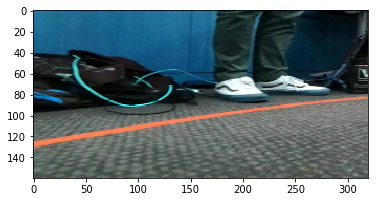

In [7]:
plt.imshow(images[-1])

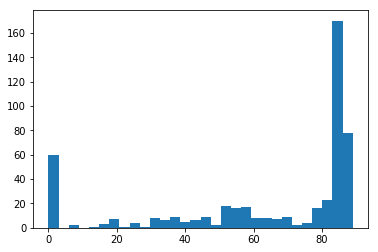

In [8]:
plt.hist(labels,bins=30);

In [6]:
def reverse(image, label, offset = 20):
    """offset: correct for positioning of left vs right cameras
        ex: a flip from left camera should be reduced in angle? """
    return [cv2.flip(image, flipCode=1)], [-label + -offset]

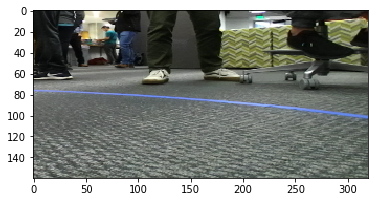

In [8]:
plt.imshow(cv2.cvtColor(reverse(images[-1], 100)[0], cv2.COLOR_BGR2RGB))

In [7]:
def randomShadow(image, label, gen_rate = 1):
    """gen-rate: specify how many new images to gen from source image"""
    # currently null
    return [image], [label]

In [8]:
def randomBrightness(image, label, gen_rate = 1, intensity_range = (0.3,1.3)):
    """intensity_range: multipliers of how bright gen image should be"""
    copy = [image]*gen_rate
    for i in range(gen_rate):
        c = copy[i].astype(np.float32)
        nb = np.random.uniform(intensity_range[0], intensity_range[1], gen_rate)
        c[:,:,:] *= nb
        np.clip(c, 0, 255)
        c = np.uint8(c)
    return copy, [label]*gen_rate
    

In [9]:
def angleNoise(image, label, gen_rate = 2, sigma = 5):
    """apply random noise to label, return new image,label pairs with new image"""
    return [image]*gen_rate, [label+int(x) for x in np.random.normal(0, sigma, gen_rate)]

In [10]:
def shiftImage(image, label, x_low, x_high, y_low, y_high, angle_delta):
    rows, cols = (image.shape[0], image.shape[1])
    translation_x = np.random.randint(x_low, x_high) 
    translation_y = np.random.randint(y_low, y_high) 
    new_angle = angle_delta * translation_x
    translation_matrix = np.float32([[1, 0, translation_x],[0, 1, translation_y]])
    image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    
    return [image], [new_angle]
    

In [11]:
# out: new images and labels
# future concerns: sequential loading, in-place processing to avoid memory load
def process(args, images, labels, p=1.0):
    new_imgs, new_labels = [],[]
    #targetFuncs = [reverse, randomShadow, randomBrightness, angleNoise] #important part
    for i in range(len(images)):
        new_imgs.append(images[i]); new_labels.append(labels[i])
        
        if np.random.random_sample() <= p:
            n_img, n_label = reverse(images[i], labels[i])
            new_imgs += n_img
            new_labels += n_label
        
        if np.random.random_sample() <= p:
            n_img, n_label = randomBrightness(images[i], labels[i])
            new_imgs += n_img
            new_labels += n_label
            
        if np.random.random_sample() <= p:
            n_img, n_label = angleNoise(images[i], labels[i])
            new_imgs += n_img
            new_labels += n_label
            
        if np.random.random_sample() <= p:
            n_img, n_label = shiftImage(images[i], labels[i],-60, 60, -10,10, 5/100.0)
            new_imgs += n_img
            new_labels += n_label
            
#         for f in targetFuncs: 
#             n_imgs, n_labels = f(images[i], labels[i])
                
#             new_imgs += n_imgs 
#             new_labels += n_labels
    
    
    return new_imgs, new_labels
        

In [12]:
newimages, newlabels = process(None, images, labels)

In [25]:
len(newimages)

3000

(array([ 62.,   4.,  12.,  15.,  20.,  29.,  41.,  24.,  22., 271.]),
 array([ 0. ,  8.9, 17.8, 26.7, 35.6, 44.5, 53.4, 62.3, 71.2, 80.1, 89. ]),
 <a list of 10 Patch objects>)

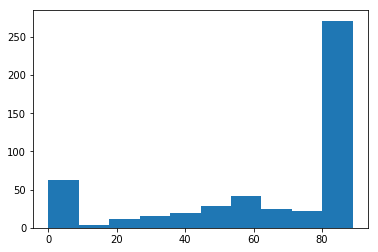

In [26]:
plt.hist(labels)

(array([305.,  77.,  44.,  14., 131., 705., 143., 304., 359., 918.]),
 array([-109. ,  -87.7,  -66.4,  -45.1,  -23.8,   -2.5,   18.8,   40.1,
          61.4,   82.7,  104. ]),
 <a list of 10 Patch objects>)

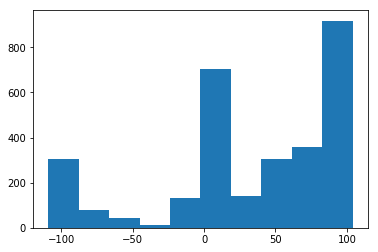

In [28]:
plt.hist(newlabels)

In [13]:
images = newimages; labels = newlabels #renaming actually matters
np.savez(LOAD_LOC+'.npz', images, labels)

In [ ]:
def main():
    parser = argparse.ArgumentParser(description='[image preprocessing]  choose bag')
    parser.add_argument("path", type=str, help="path to bag")
    args = parser.parse_args()

    data, labels = get_data(args.path)


if __name__ == '__main__':
    main()